In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

In [2]:
df = pd.read_csv('sat.trn',header=None,sep = '\s')

In [3]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
y[y==7] = 6
for i in range(6):
    y[y == (i + 1)] = i

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [6]:
def get_winner(class1):
    
    numbers = [*range(6)] # number 2 > number 1
    number_of_classification = len(numbers)

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 4435
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 10)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-satellite2")
    [stats, winner] = run(config_path)
    
    return winner

In [ ]:
number_codes = []
for i in range(2**5, 2**6-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**5 - 1,6).T.tolist() 

In [ ]:
classes = []
for i in range(2**5 - 1):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [7]:
winner_list = []
#classes = [[0],[0,5],[0,4],[0,4,5],[0,3],[0,3,5],[0,3,4],[0,3,4,5],[0,2],[0,2,5],[0,2,4],[0,2,4,5],[0,2,3],[0,2,3,5],[0,2,3,4],[0,2,3,4,5],[0,1],[0,1,5],[0,1,4],[0,1,4,5],[0,1,3],[0,1,3,5],[0,1,3,4],[0,1,3,4,5],[0,1,2],[0,1,2,5],[0,1,2,4],[0,1,2,4,5],[0,1,2,3],[0,1,2,3,5],[0,1,2,3,4]]

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:1072
number of class2:3363

 ****** Running generation 0 ****** 

Population's average fitness: 0.63076 stdev: 0.20972
Best fitness: 0.89853 - size: (2, 7) - species 1 - id 195
Average adjusted fitness: 0.431
Mean genetic distance 2.837, standard deviation 0.483
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 12.534 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.67458 stdev: 0.18553
Best fitness: 0.89853 - size: (2, 7) - species 6 - id 195
Average adjusted fitness: 0.418
Mean genetic distance 2.916, standard deviation 0.498
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 14.047 sec (13.290 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65740 stdev: 0.19654
Best fitness: 0.89853 - size: (2, 7) - species 6 - id 195
Average adjusted fitness: 0.417
Mean genetic distance 2.915, standard deviation 0.514
Population of 202 members in 27 species
Total extinct


Population's average fitness: 0.59566 stdev: 0.12750
Best fitness: 0.84059 - size: (4, 9) - species 1 - id 535
Average adjusted fitness: 0.239
Mean genetic distance 2.986, standard deviation 0.545
Population of 208 members in 28 species
Total extinctions: 0
Generation time: 13.602 sec (12.731 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59682 stdev: 0.12649
Best fitness: 0.84059 - size: (4, 9) - species 1 - id 535
Average adjusted fitness: 0.289
Mean genetic distance 2.972, standard deviation 0.533
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 14.017 sec (12.945 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59490 stdev: 0.12967
Best fitness: 0.84059 - size: (4, 9) - species 1 - id 535
Average adjusted fitness: 0.333
Mean genetic distance 2.962, standard deviation 0.533
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 13.773 sec (13.063 average)

 ****** Run

Population's average fitness: 0.60736 stdev: 0.12766
Best fitness: 0.78174 - size: (2, 7) - species 15 - id 34
Average adjusted fitness: 0.417
Mean genetic distance 2.866, standard deviation 0.541
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 13.258 sec (12.405 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59317 stdev: 0.14213
Best fitness: 0.85705 - size: (3, 8) - species 15 - id 1648
Average adjusted fitness: 0.334
Mean genetic distance 2.938, standard deviation 0.558
Population of 205 members in 24 species
Total extinctions: 0
Generation time: 12.796 sec (12.444 average)
number of class1:2525
number of class2:1910

 ****** Running generation 0 ****** 

Population's average fitness: 0.47107 stdev: 0.07373
Best fitness: 0.67148 - size: (2, 7) - species 3 - id 155
Average adjusted fitness: 0.171
Mean genetic distance 2.882, standard deviation 0.512
Population of 200 members in 20 species
Total extinctions: 0
Generation t

Population's average fitness: 0.55558 stdev: 0.17254
Best fitness: 0.76979 - size: (2, 7) - species 5 - id 536
Average adjusted fitness: 0.295
Mean genetic distance 2.994, standard deviation 0.522
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 12.111 sec (12.171 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56104 stdev: 0.17330
Best fitness: 0.76979 - size: (2, 7) - species 5 - id 536
Average adjusted fitness: 0.284
Mean genetic distance 2.997, standard deviation 0.534
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 14.010 sec (12.631 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.54570 stdev: 0.18358
Best fitness: 0.76979 - size: (2, 7) - species 5 - id 536
Average adjusted fitness: 0.281
Mean genetic distance 3.004, standard deviation 0.510
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 15.849 sec (13.274 average)

 ****** Runn

Population's average fitness: 0.57946 stdev: 0.20440
Best fitness: 0.83878 - size: (6, 15) - species 9 - id 735
Average adjusted fitness: 0.369
Mean genetic distance 3.002, standard deviation 0.471
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 13.694 sec (12.149 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59959 stdev: 0.20053
Best fitness: 0.83878 - size: (6, 15) - species 9 - id 735
Average adjusted fitness: 0.368
Mean genetic distance 3.004, standard deviation 0.473
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 13.597 sec (12.330 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61371 stdev: 0.19457
Best fitness: 0.83878 - size: (6, 15) - species 9 - id 735
Average adjusted fitness: 0.379
Mean genetic distance 3.053, standard deviation 0.478
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 13.659 sec (12.478 average)

 ****** R


 ****** Running generation 0 ****** 

Population's average fitness: 0.48009 stdev: 0.06548
Best fitness: 0.67441 - size: (2, 7) - species 1 - id 48
Average adjusted fitness: 0.198
Mean genetic distance 2.862, standard deviation 0.524
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 10.157 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.50694 stdev: 0.08147
Best fitness: 0.68952 - size: (3, 9) - species 7 - id 290
Average adjusted fitness: 0.225
Mean genetic distance 2.968, standard deviation 0.535
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 12.710 sec (11.434 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.51405 stdev: 0.07969
Best fitness: 0.68952 - size: (3, 9) - species 7 - id 290
Average adjusted fitness: 0.222
Mean genetic distance 2.947, standard deviation 0.544
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 12.964 sec (11.944 a

Population's average fitness: 0.57116 stdev: 0.15885
Best fitness: 0.75310 - size: (3, 9) - species 20 - id 578
Average adjusted fitness: 0.310
Mean genetic distance 2.907, standard deviation 0.493
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 12.649 sec (11.719 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58901 stdev: 0.15565
Best fitness: 0.75310 - size: (3, 9) - species 20 - id 578
Average adjusted fitness: 0.330
Mean genetic distance 2.940, standard deviation 0.471
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 13.148 sec (11.957 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58277 stdev: 0.15629
Best fitness: 0.75310 - size: (3, 9) - species 20 - id 578
Average adjusted fitness: 0.322
Mean genetic distance 2.982, standard deviation 0.464
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 12.915 sec (12.094 average)

 ****** R


Population's average fitness: 0.62116 stdev: 0.15908
Best fitness: 0.94318 - size: (4, 10) - species 13 - id 946
Average adjusted fitness: 0.325
Mean genetic distance 3.194, standard deviation 0.520
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 13.435 sec (12.387 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.62391 stdev: 0.16942
Best fitness: 0.94318 - size: (4, 10) - species 13 - id 946
Average adjusted fitness: 0.355
Mean genetic distance 3.183, standard deviation 0.512
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 13.965 sec (12.545 average)
number of class1:2589
number of class2:1846

 ****** Running generation 0 ****** 

Population's average fitness: 0.46315 stdev: 0.07253
Best fitness: 0.67283 - size: (2, 7) - species 3 - id 124
Average adjusted fitness: 0.131
Mean genetic distance 2.711, standard deviation 0.423
Population of 199 members in 15 species
Total extinctions: 0
Generatio

Population's average fitness: 0.58123 stdev: 0.15913
Best fitness: 0.70349 - size: (2, 7) - species 3 - id 174
Average adjusted fitness: 0.273
Mean genetic distance 2.928, standard deviation 0.520
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 12.086 sec (11.343 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58367 stdev: 0.16237
Best fitness: 0.71026 - size: (2, 8) - species 3 - id 716
Average adjusted fitness: 0.269
Mean genetic distance 2.906, standard deviation 0.524
Population of 204 members in 26 species
Total extinctions: 0
Generation time: 12.434 sec (11.616 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59668 stdev: 0.15533
Best fitness: 0.71026 - size: (2, 8) - species 3 - id 716
Average adjusted fitness: 0.271
Mean genetic distance 2.923, standard deviation 0.535
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 12.806 sec (11.854 average)

 ****** Runn

Population's average fitness: 0.56220 stdev: 0.15800
Best fitness: 0.68117 - size: (3, 9) - species 7 - id 277
Average adjusted fitness: 0.235
Mean genetic distance 2.885, standard deviation 0.498
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 12.557 sec (12.088 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57407 stdev: 0.15313
Best fitness: 0.68117 - size: (3, 9) - species 7 - id 277
Average adjusted fitness: 0.244
Mean genetic distance 2.890, standard deviation 0.514
Population of 208 members in 29 species
Total extinctions: 0
Generation time: 12.833 sec (12.181 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58689 stdev: 0.14741
Best fitness: 0.68117 - size: (3, 9) - species 7 - id 277
Average adjusted fitness: 0.259
Mean genetic distance 2.872, standard deviation 0.508
Population of 207 members in 29 species
Total extinctions: 0
Generation time: 13.647 sec (12.344 average)

 ****** Runn

Population's average fitness: 0.46612 stdev: 0.06225
Best fitness: 0.71702 - size: (2, 7) - species 2 - id 166
Average adjusted fitness: 0.179
Mean genetic distance 2.794, standard deviation 0.460
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 11.554 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.48950 stdev: 0.07293
Best fitness: 0.71702 - size: (2, 7) - species 2 - id 166
Average adjusted fitness: 0.232
Mean genetic distance 2.865, standard deviation 0.471
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 12.712 sec (12.133 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52184 stdev: 0.07295
Best fitness: 0.71702 - size: (2, 7) - species 2 - id 166
Average adjusted fitness: 0.233
Mean genetic distance 2.862, standard deviation 0.501
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 13.843 sec (12.703 average)

 ****** Running generation 3 

Population's average fitness: 0.58417 stdev: 0.14624
Best fitness: 0.74589 - size: (3, 9) - species 31 - id 835
Average adjusted fitness: 0.252
Mean genetic distance 3.008, standard deviation 0.566
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 12.762 sec (11.902 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59188 stdev: 0.14786
Best fitness: 0.76776 - size: (2, 6) - species 4 - id 1025
Average adjusted fitness: 0.384
Mean genetic distance 3.033, standard deviation 0.560
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 12.749 sec (12.023 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59253 stdev: 0.13872
Best fitness: 0.76776 - size: (2, 6) - species 4 - id 1025
Average adjusted fitness: 0.353
Mean genetic distance 3.026, standard deviation 0.554
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 12.310 sec (12.059 average)

 ****** R


 ****** Running generation 9 ****** 

Population's average fitness: 0.56881 stdev: 0.14279
Best fitness: 0.73641 - size: (6, 12) - species 30 - id 1202
Average adjusted fitness: 0.319
Mean genetic distance 3.032, standard deviation 0.514
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 15.545 sec (13.569 average)
number of class1:3965
number of class2:470

 ****** Running generation 0 ****** 

Population's average fitness: 0.33093 stdev: 0.33204
Best fitness: 0.89470 - size: (2, 7) - species 5 - id 180
Average adjusted fitness: 0.169
Mean genetic distance 2.827, standard deviation 0.445
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 12.680 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53983 stdev: 0.37437
Best fitness: 0.89470 - size: (3, 8) - species 7 - id 220
Average adjusted fitness: 0.505
Mean genetic distance 2.933, standard deviation 0.449
Population of 199 members in 22 species
Total extin

In [11]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-satellite2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [12]:
test_df = pd.read_csv('sat.tst',header=None,sep = '\s')

testX = test_df.iloc[:,:-1].to_numpy()
testy = test_df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
testy[testy==7] = 6
for i in range(6):
    testy[testy == (i + 1)] = i

In [13]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(6)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = testX[j]
    test_y = testy[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [34]:
# number_codes = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
# [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
# [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1],
# [0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1],
# [0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1],
# [0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]]

In [18]:
pred_value = []
error_list = []

for j in range(2000):
    pred = []
    for i in range(31):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(6):
        error.append(31 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [19]:
from random import randint
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == testy)/2000

0.6805

In [20]:
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], testy[i]))

#0 min_error:7 index:[0] real:2
#1 min_error:7 index:[0] real:2
#2 min_error:7 index:[2] real:3
#3 min_error:7 index:[2] real:3
#4 min_error:8 index:[2 5] real:3
#5 min_error:7 index:[2] real:3
#6 min_error:7 index:[2] real:3
#7 min_error:7 index:[5] real:3
#8 min_error:7 index:[5] real:3
#9 min_error:6 index:[5] real:3
#10 min_error:7 index:[5] real:3
#11 min_error:6 index:[5] real:3
#12 min_error:6 index:[5] real:3
#13 min_error:6 index:[5] real:3
#14 min_error:7 index:[2] real:2
#15 min_error:7 index:[2] real:2
#16 min_error:7 index:[2] real:2
#17 min_error:8 index:[2 5] real:2
#18 min_error:8 index:[2 5] real:2
#19 min_error:8 index:[2 5] real:2
#20 min_error:6 index:[2] real:2
#21 min_error:8 index:[2 5] real:2
#22 min_error:7 index:[2] real:2
#23 min_error:7 index:[5] real:2
#24 min_error:8 index:[2 5] real:2
#25 min_error:7 index:[5] real:2
#26 min_error:7 index:[5] real:2
#27 min_error:10 index:[1 2 4] real:4
#28 min_error:7 index:[5] real:5
#29 min_error:7 index:[5] real:5
#30

#714 min_error:0 index:[1] real:1
#715 min_error:0 index:[1] real:1
#716 min_error:8 index:[2 5] real:2
#717 min_error:7 index:[5] real:2
#718 min_error:7 index:[2] real:2
#719 min_error:7 index:[5] real:2
#720 min_error:7 index:[5] real:2
#721 min_error:7 index:[5] real:2
#722 min_error:5 index:[5] real:5
#723 min_error:3 index:[5] real:5
#724 min_error:3 index:[5] real:5
#725 min_error:4 index:[5] real:5
#726 min_error:5 index:[5] real:5
#727 min_error:5 index:[5] real:5
#728 min_error:6 index:[5] real:5
#729 min_error:3 index:[5] real:5
#730 min_error:3 index:[5] real:5
#731 min_error:3 index:[5] real:5
#732 min_error:5 index:[5] real:5
#733 min_error:7 index:[5] real:5
#734 min_error:10 index:[0 2 4 5] real:4
#735 min_error:9 index:[5] real:4
#736 min_error:8 index:[5] real:5
#737 min_error:6 index:[2] real:3
#738 min_error:8 index:[5] real:3
#739 min_error:6 index:[5] real:4
#740 min_error:5 index:[5] real:3
#741 min_error:0 index:[1] real:1
#742 min_error:0 index:[1] real:1
#743 

In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, testy)
print(cm)

[[457   1  13   4  25   5]
 [  0 215   0   0  48   1]
 [  4   2 183  54  15  47]
 [  0   0   0   0   0   1]
 [  0   4   2   3  93   3]
 [  0   2 199 150  56 413]]


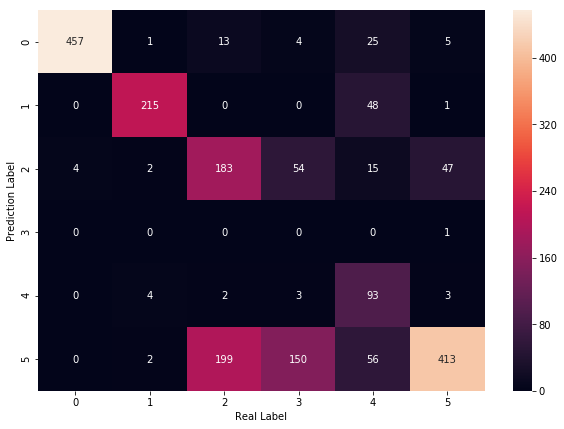

In [22]:
import seaborn as sn

df_cm = pd.DataFrame(cm, index = [i for i in "012345"],
                  columns = [i for i in "012345"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, fmt='.20g', annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()